In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_phone=pd.read_csv('train_2.csv',sep=',')
data_phone.head(100)
data_phone.shape
data_phone.describe()


data_phone.info()
# Check unique values in target variable (price_range)
print(data_phone["price_range"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

 This dataset gathers information on 2000 data on mobile phones and the 21 different characteristics that compose them such as price, battery level, RAM, etc.  .All variables are numeric, now we have to see if there is categorical variables even if numerical variables.

In [2]:
num_vars = data_phone.select_dtypes(include=['int64', 'float64']).columns
cat_like_vars = [col for col in num_vars if data_phone[col].nunique() < 10]  # Seuil arbitraire
print("Categorical numeric variables :", cat_like_vars)

Categorical numeric variables : ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']


Of the 21 variables, there are 8 which although the dtype is numeric , are in fact categorical variables.

In [ ]:
# Columns list
print("Columns list :", data_phone.columns.tolist())

# Summary of missing values
print("Missing values by columns :\n", data_phone.isnull().sum())

# Target variable summary
print("Target variable distribution :\n", data_phone["price_range"].value_counts())  # Modifier selon la vraie colonne cible


Columns list : ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
Missing values by columns :
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Target variable distribution :
 price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


There are no missing values ​​and as we can see above, we have a uniform distribution in terms of frequency for different price ranges

To get a better representation, we can use a visual aid:



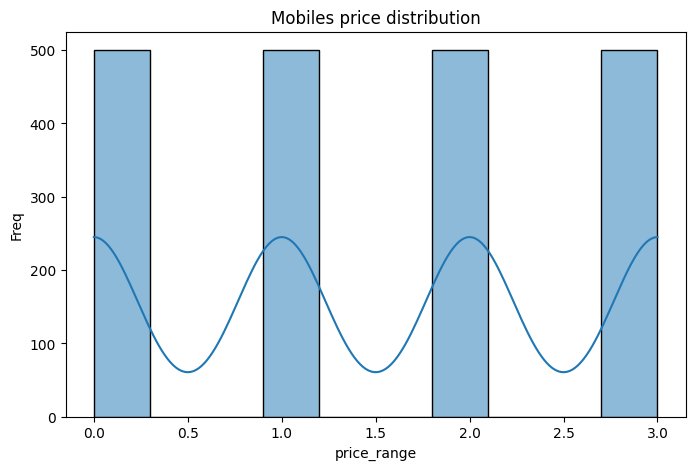

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme des prix
plt.figure(figsize=(8, 5))
sns.histplot(data_phone["price_range"], bins=10, kde=True)  # Modifier selon la colonne cible
plt.xlabel("price_range")
plt.ylabel("Freq")
plt.title("Mobiles price distribution")
plt.show()

The frequency in terms of price is almost the same for all price ranges.

In [ ]:
# 3.Statistical Analysis with Numpu et Scipy

# Numeric columns selection
num_features = data_phone.select_dtypes(include=[np.number]).columns

# Mean, Median,Mode
central_tendency = pd.DataFrame({
    "Mean": data_phone[num_features].mean(),
    "Median": data_phone[num_features].median(),
    "Mode": data_phone[num_features].mode().iloc[0]
})

print(central_tendency)

                     Mean  Median    Mode
battery_power  1238.51850  1226.0   618.0
blue              0.49500     0.0     0.0
clock_speed       1.52225     1.5     0.5
dual_sim          0.50950     1.0     1.0
fc                4.30950     3.0     0.0
four_g            0.52150     1.0     1.0
int_memory       32.04650    32.0    27.0
m_dep             0.50175     0.5     0.1
mobile_wt       140.24900   141.0   182.0
n_cores           4.52050     4.0     4.0
pc                9.91650    10.0    10.0
px_height       645.10800   564.0   347.0
px_width       1251.51550  1247.0   874.0
ram            2124.21300  2146.5  1229.0
sc_h             12.30650    12.0    17.0
sc_w              5.76700     5.0     1.0
talk_time        11.01100    11.0     7.0
three_g           0.76150     1.0     1.0
touch_screen      0.50300     1.0     1.0
wifi              0.50700     1.0     1.0
price_range       1.50000     1.5     0.0


In [ ]:
from scipy import stats
# Variability computation with SciPy
variability = pd.DataFrame({
    "Variance": [stats.tvar(data_phone[col].dropna()) for col in num_features],
    "Standard Deviation": [stats.tstd(data_phone[col].dropna()) for col in num_features],
    "Range": [np.ptp(data_phone[col].dropna()) for col in num_features]  # Peak-to-Peak (max - min)
}, index=num_features)

print(variability)

                   Variance  Standard Deviation   Range
battery_power  1.930884e+05          439.418206  1497.0
blue           2.501001e-01            0.500100     1.0
clock_speed    6.658629e-01            0.816004     2.5
dual_sim       2.500348e-01            0.500035     1.0
fc             1.884813e+01            4.341444    19.0
four_g         2.496626e-01            0.499662     1.0
int_memory     3.292670e+02           18.145715    62.0
m_dep          8.318353e-02            0.288416     0.9
mobile_wt      1.253136e+03           35.399655   120.0
n_cores        5.234197e+00            2.287837     7.0
pc             3.677592e+01            6.064315    20.0
px_height      1.969414e+05          443.780811  1960.0
px_width       1.867964e+05          432.199447  1498.0
ram            1.176644e+06         1084.732044  3742.0
sc_h           1.775143e+01            4.213245    14.0
sc_w           1.897820e+01            4.356398    18.0
talk_time      2.985481e+01            5.463955 

In [ ]:
import scipy.stats as stats

# Skewness, kurtosis computation
distribution_shapes = pd.DataFrame({
    "Skewness": [stats.skew(data_phone[col]) for col in num_features],
    "Kurtosis": [stats.kurtosis(data_phone[col]) for col in num_features]
}, index=num_features)

print(distribution_shapes)

               Skewness  Kurtosis
battery_power  0.031875 -1.224084
blue           0.020001 -1.999600
clock_speed    0.177951 -1.323109
dual_sim      -0.038007 -1.998555
fc             1.019046  0.273386
four_g        -0.086080 -1.992590
int_memory     0.057846 -1.216034
m_dep          0.089015 -1.274164
mobile_wt      0.006553 -1.210351
n_cores        0.003625 -1.229676
pc             0.017293 -1.171571
px_height      0.665771 -0.318075
px_width       0.014776 -1.186041
ram            0.006623 -1.191934
sc_h          -0.098810 -1.190815
sc_w           0.633312 -0.391548
talk_time      0.009505 -1.218545
three_g       -1.227220 -0.493930
touch_screen  -0.012000 -1.999856
wifi          -0.028003 -1.999216
price_range    0.000000 -1.360000


Many variables have a kurtosis value either negative or positive and therefore different from 0 . Meaning that within these variables, there is a fairly large disparity in the observed values:

-Variables value indicates heavy tails (more outliers).
- Other variables  indicates light tails.

We also find negative and positive skewness values ​​for the different variables but also some variables whose skewness is close to 0, which means 3 things:

-Variables with a right-tailed distribution.
-Variables with a left-tailed distribution.
-Symetric distribution for skewness close of 0

In [3]:
import scipy.stats as stats

# Comparison of battery power between two groups (low price vs high price)

low_price = data_phone[data_phone["price_range"] == 0]["battery_power"]
high_price = data_phone[data_phone["price_range"] == 3]["battery_power"]
print(high_price)
# Student's test (T-test) to see if there is a significant difference
t_stat, p_value = stats.ttest_ind(low_price, high_price, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Statistically significant difference between groups.")
else:
    print("No significant difference.")

6       1821
10       769
11      1520
16       838
17       595
        ... 
1991    1882
1993    1467
1994     858
1997    1911
1999     510
Name: battery_power, Length: 500, dtype: int64
T-Statistic: -10.07428069471104, P-Value: 8.453706855116637e-23
Statistically significant difference between groups.


This test shows that for 2 price categories, the battery power will not be the same and therefore there is a relationship between the price range and the battery power.

In [9]:
import scipy.stats as stats
# Split data into groups based on price_range
group_low = data_phone[data_phone["price_range"] == 0]["ram"]
group_high = data_phone[data_phone["price_range"] == 3]["ram"]

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_low, group_high)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant difference between groups.")
else:
    print("No significant difference.")

T-statistic: -111.37307717748769, P-value: 0.0
Statistically significant difference between groups.


we conclude that ram has a statistically significant impact on mobile price.

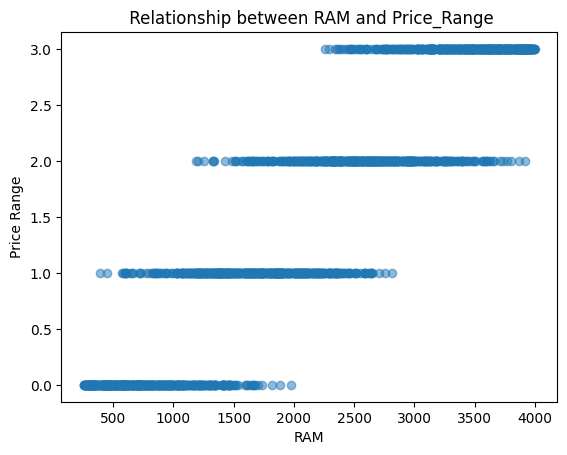

In [6]:
# 4. Data vizualisation
plt.scatter(data_phone["ram"], data_phone["price_range"], alpha=0.5)
plt.title(" Relationship between RAM and Price_Range")
plt.xlabel("RAM")
plt.ylabel("Price Range")
plt.show()

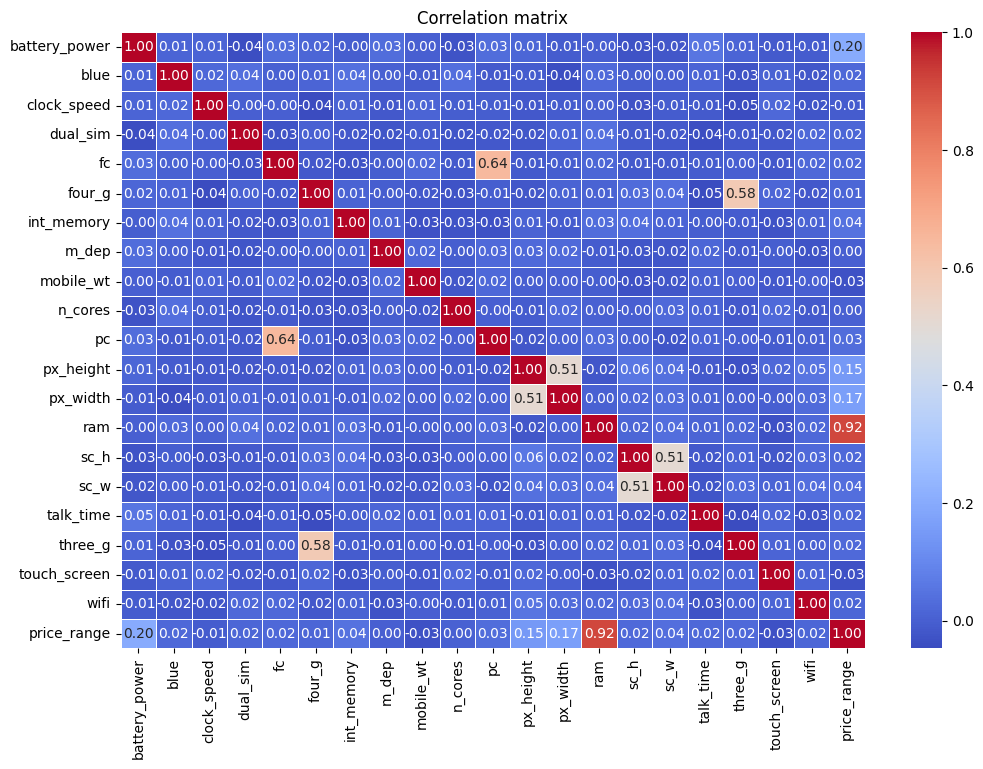

In [12]:
# Correlation matrix
correlation_matrix = data_phone.corr()

# Correlation with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

On the correlation matrix above, few variables are correlated with the price_range variable. Only ram, battery_power, px_height and px_width variables are most correlated with the target variable.

In [13]:
correlations = {}
for col in data_phone.columns:
    if col != "price_range":  # Exclude the target variable itself
        corr, p_value = stats.spearmanr(data_phone[col], data_phone["price_range"])
        correlations[col] = (corr, p_value)

# Convert results to a DataFrame for better readability
correlation_df = pd.DataFrame(correlations, index=["Spearman Correlation", "P-value"]).T
print(correlation_df.sort_values(by="Spearman Correlation", ascending=False))

               Spearman Correlation       P-value
ram                        0.917080  0.000000e+00
battery_power              0.199991  1.722306e-19
px_width                   0.165134  1.074056e-13
px_height                  0.131884  3.215011e-09
int_memory                 0.044278  4.771653e-02
pc                         0.032824  1.422683e-01
sc_w                       0.024776  2.680838e-01
fc                         0.024167  2.800284e-01
sc_h                       0.023727  2.888849e-01
three_g                    0.023611  2.912366e-01
talk_time                  0.022138  3.224067e-01
blue                       0.020573  3.577985e-01
wifi                       0.018785  4.011152e-01
dual_sim                   0.017444  4.355602e-01
four_g                     0.014772  5.091037e-01
n_cores                    0.004651  8.353162e-01
m_dep                     -0.000322  9.885235e-01
clock_speed               -0.005436  8.080353e-01
mobile_wt                 -0.030214  1.767996e-01


Using the Spearman correlation test, we have above a representation of the degree of correlation between the target variable "price_range" and the other variables as well as the value of their respective p-value.

If we refer to the degree of correlation and if we consider only the p-value<0.05, the variables which most influence the price of mobile phones are:
"ram", "battery_power", "pw_width", "px_height"

In [4]:
from scipy.stats import linregress

x = data_phone["battery_power"]
y = data_phone["price_range"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f" regression equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R²: {r_value**2:.4f}, P-Value: {p_value:.4f}")

 regression equation: y = 0.0005x + 0.8673
R²: 0.0403, P-Value: 0.0000


In [5]:
from scipy.stats import linregress

x = data_phone["ram"]
y = data_phone["price_range"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"regression equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R²: {r_value**2:.4f}, P-Value: {p_value:.4f}")

regression equation: y = 0.0009x + -0.5083
R²: 0.8410, P-Value: 0.0000


When we look at the value of R2  obtained by regression for the relationship between ram and price_range we can observe a high value although this value is lower for the battery power.

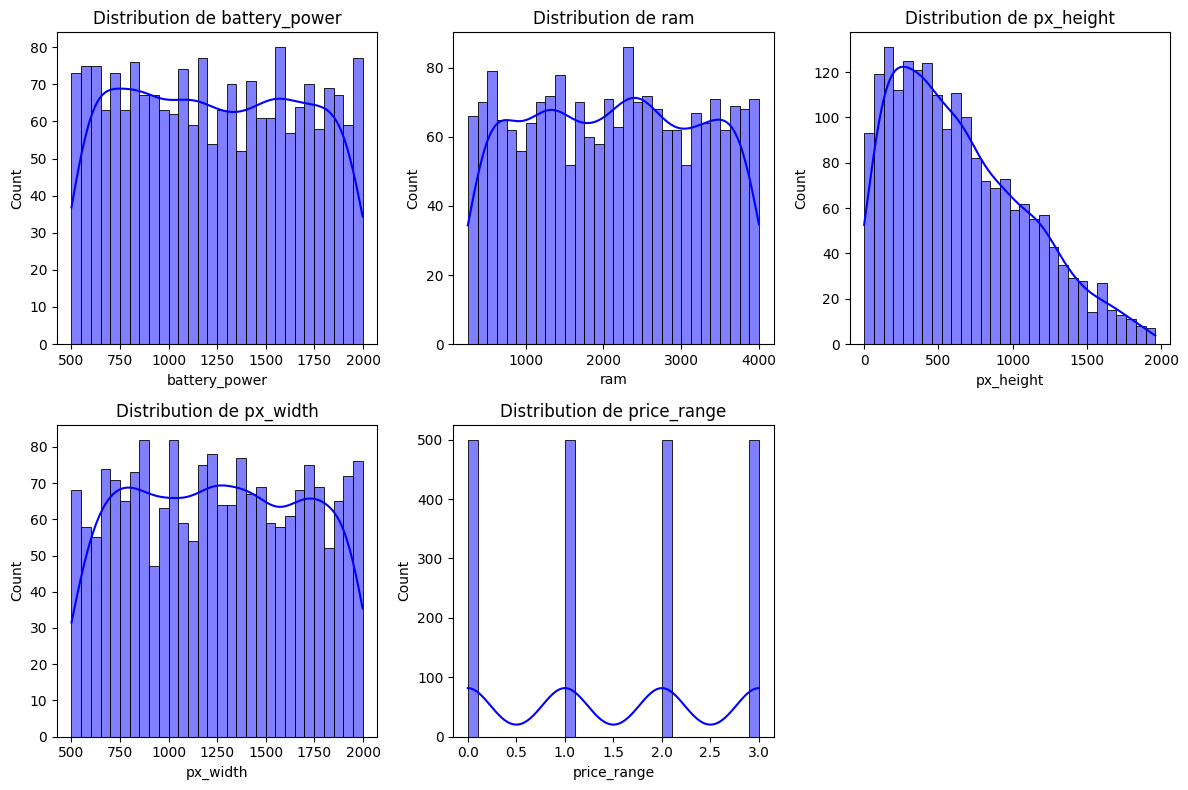

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables of interest selection
num_features2 = ["battery_power", "ram", "px_height", "px_width", "price_range"]

# Histogram drawing
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features2, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_phone[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

We see through these histograms that the 4 explanatory variables (battery_power, ram, px_height, px_width) present very disparate distributions in terms of values.

<ipython-input-15-c612b5e87954>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="battery_power", data=data_phone, palette="Set2")


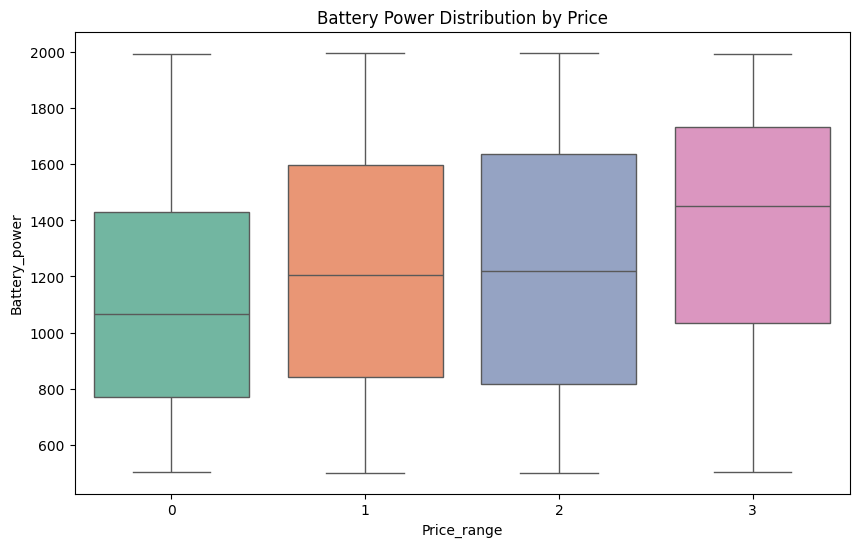

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="price_range", y="battery_power", data=data_phone, palette="Set2")
plt.xlabel("Price_range")
plt.ylabel("Battery_power")
plt.title("Battery Power Distribution by Price")
plt.show()

We observe an increase in battery power with an increase in price


Insight synthesis and conclusion:

Through the different correlation tests, significance of the variables and visual supports, we can conclude the significance of the variables such as ram, battery_power, px_height and px_width as explanatory variables of the different price ranges. The other variables exert less influence on the price range (price_range).

The point where I would like to make a comment is on the implementation of a linear  regression to establish the relationship between ram and price_range and the battery power and price_range. I think that a linear equation was not the most suitable to describe the relationships between these variables.